In [5]:
import matplotlib.pyplot as plt
import os

def read_instance(filepath):
    with open(filepath, 'r') as f:
        lines = [line.strip() for line in f if line.strip()]

    # Line 1: number of customers, number of lockers
    n_customers, n_lockers = map(int, lines[0].split())
    
    # Line 2: vehicles (skip)
    
    # Next n_customers lines: demands (skip)
    current_line = 2 + n_customers
    
    # Next line: Depot
    depot_line = lines[current_line].split()
    depot = {
        'x': float(depot_line[0]),
        'y': float(depot_line[1]),
        'type': 0 # Assuming 0 is depot
    }
    current_line += 1
    
    customers = []
    for _ in range(n_customers):
        parts = lines[current_line].split()
        customers.append({
            'x': float(parts[0]),
            'y': float(parts[1]),
            'type': int(parts[-1])
        })
        current_line += 1
        
    lockers = []
    for _ in range(n_lockers):
        parts = lines[current_line].split()
        lockers.append({
            'x': float(parts[0]),
            'y': float(parts[1]),
            'type': int(parts[-1]) # Should be 4
        })
        current_line += 1
        
    return depot, customers, lockers

In [6]:
# Visualization
def plot_instance(depot, customers, lockers, title='Instance Visualization'):
    plt.figure(figsize=(10, 10))
    
    # Plot Depot
    plt.scatter(depot['x'], depot['y'], c='red', marker='s', s=100, label='Depot')
    
    # Plot Customers
    # Group by type for different colors
    cust_x_type1 = [c['x'] for c in customers if c['type'] == 1]
    cust_y_type1 = [c['y'] for c in customers if c['type'] == 1]
    plt.scatter(cust_x_type1, cust_y_type1, c='blue', marker='o', label='Home Delivery (Type 1)')
    
    cust_x_type2 = [c['x'] for c in customers if c['type'] == 2]
    cust_y_type2 = [c['y'] for c in customers if c['type'] == 2]
    plt.scatter(cust_x_type2, cust_y_type2, c='green', marker='o', label='Locker Delivery (Type 2)')
    
    cust_x_type3 = [c['x'] for c in customers if c['type'] == 3]
    cust_y_type3 = [c['y'] for c in customers if c['type'] == 3]
    plt.scatter(cust_x_type3, cust_y_type3, c='orange', marker='o', label='Home/Locker (Type 3)')
    
    # Plot Lockers
    locker_x = [l['x'] for l in lockers]
    locker_y = [l['y'] for l in lockers]
    plt.scatter(locker_x, locker_y, c='purple', marker='^', s=100, label='Lockers')
    
    plt.title(title)
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.legend()
    # plt.grid(True)
    plt.show()

Loaded 100 customers and 5 lockers.


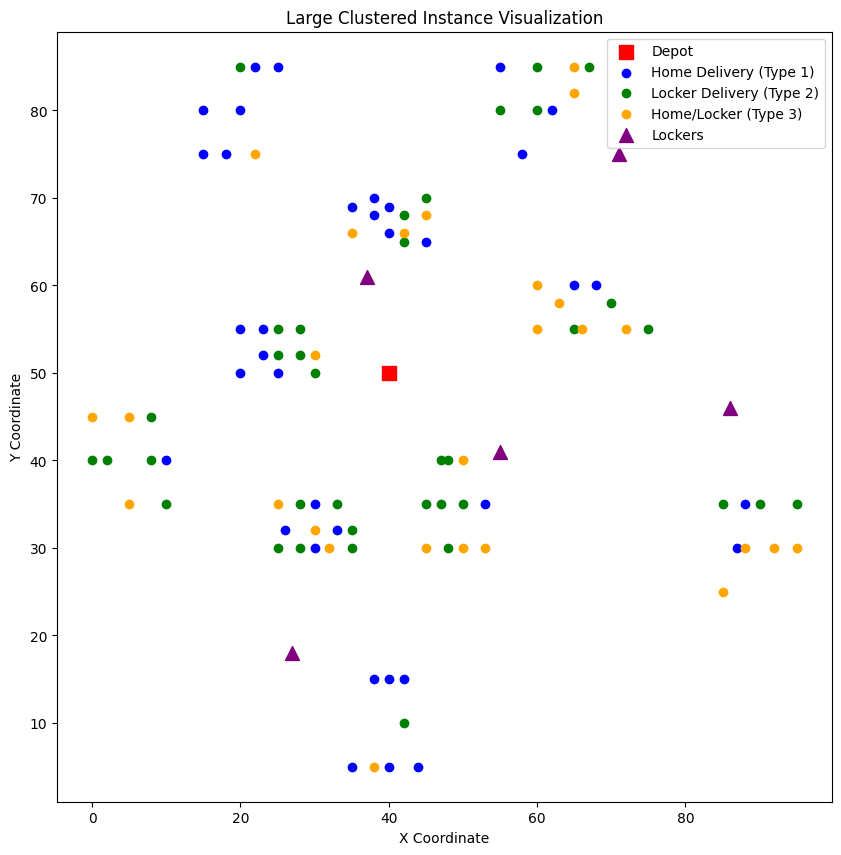

In [ ]:

# Path to the data file
data_path = '../src/data/100/R101_co_100.txt'

# Load data
try:
    depot, customers, lockers = read_instance(data_path)
    print(f"Loaded {len(customers)} customers and {len(lockers)} lockers.")
except FileNotFoundError:
    print(f"File not found: {data_path}")

if 'depot' in locals():
    plot_instance(depot, customers, lockers, "Large Random Instance Visualization")